# 汎用スクリプト　base
概要：このファイルは①データ読み込み、②可視化、③前処理、④分析までを型化し、汎用利用を考えたもの

活用方法：記載されているコードをベースにし、プロセスごとにコードを整理し、データサイエンスプロセスを効率化




## ⓪ライブラリ読み込み

In [50]:
#データ加工ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

#label encoding
from sklearn.preprocessing import LabelEncoder

#統計
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

#学習モデル

#線形モデル一覧　https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
#線形モデルの説明　https://scikit-learn.org/stable/modules/linear_model.html#linear-model

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


# import xgboost as xgb
# import xgboost as xgb
import lightgbm as lgb

## ①データ読み込み



## 進め方

■流れ
文字コードによって適切に読み込まれない場合がある場合は、以下の様に進める

①文字コードの特定(nkf)　②pandas.read_csvの引数指定

■文字コード

https://dev.classmethod.jp/tool/character-code-and-line-feed-code-converting-tools-matome/

■公式　pandas.read_csv

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html



In [51]:
#csvファイルの読み込み
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')



## ②可視化


セルを右クリックして、variable inspectorを利用すると、データの表を確認できる

より複雑な可視化をする場合は、BIツールで実施したほうが費用対効果高そう

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

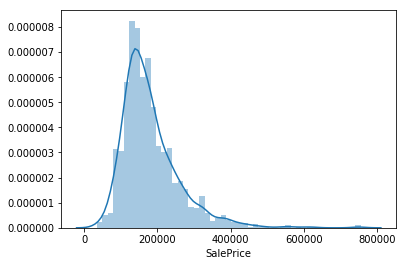

-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Ext

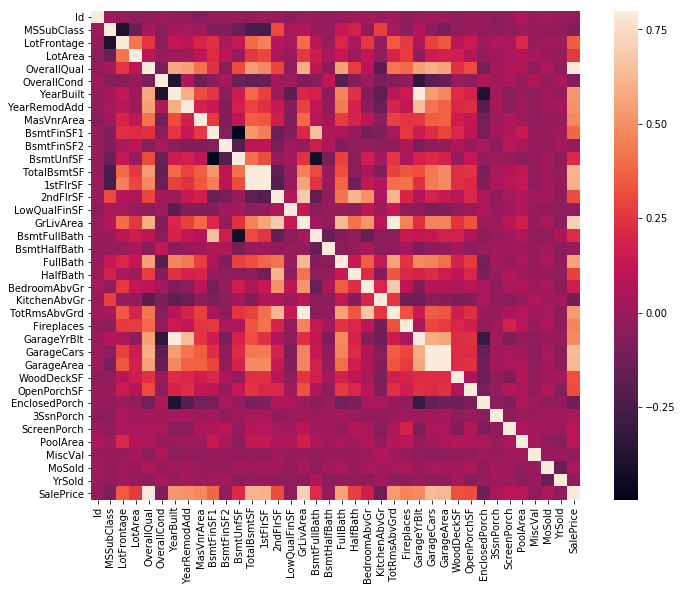

In [52]:
#列名の確認
print(df_train.columns)
print("-----------------------")

#目的変数の基本統計量確認
print(df_train['SalePrice'].describe())
print("-----------------------")

#目的変数をヒストグラムでの可視化
sns.distplot(df_train['SalePrice'])
plt.show()

#データフレーム情報　
#フレームの見方
# data_column(項目名) num(数が行数とあっていれば、欠損なし) int64,float64,object(object⇛質的変数　int,float⇛量的変数)

print("-----------------------")
print("データフレーム情報_train",df_train.info())

print("-----------------------")
print("データフレーム情報_test",df_test.info())

#相関ヒートマップ
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

## ③前処理
各変数において必要な処理は以下のようになる。（個人的な理解）特徴量エンジニアリングの世界なので、まだ完全に定石手法を理解しきれていない、

①特徴選択

②特徴データに対する欠損対応

③適切なデータ変換(量⇛質　質⇛量)

③説明変数に対して、正規化対応

## 前処理

In [53]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## 外れ値対応

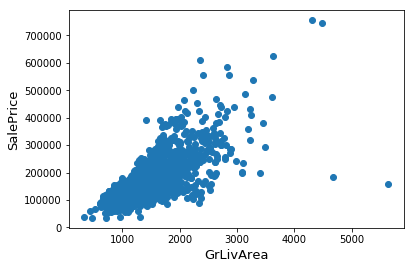

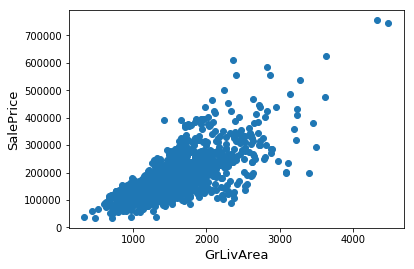

In [54]:
#削除前プロット
fig,ax=plt.subplots()
ax.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

#右下の外れ値を削除

df_train=df_train.drop(df_train[(df_train['GrLivArea']>4000)&(df_train['SalePrice']<=300000)].index)

#削除後プロット
fig,ax=plt.subplots()
ax.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()



## 目的変数の再確認


 mu=180932.92 and sigma =79467.79



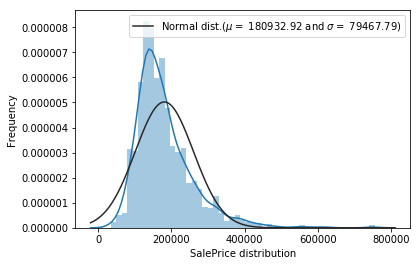

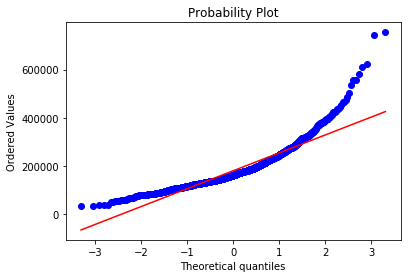

In [55]:
#matlotlib https://matplotlib.org/gallery.html#lines_bars_and_markers
#seaborn 公式リンク　https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(df_train['SalePrice'],fit=norm)

#平均と標準偏差をもとめる
(mu,sigma)=norm.fit(df_train['SalePrice'])
print('\n mu={:.2f} and sigma ={:.2f}\n'.format(mu,sigma))

#分布をプロット

#　凡例
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
#　ラベル
plt.ylabel('Frequency')
plt.xlabel('SalePrice distribution')

#QQプロット
# https://00m.in/kZFVY
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()

## ログ変換


 mu=12.02 and sigma =0.40



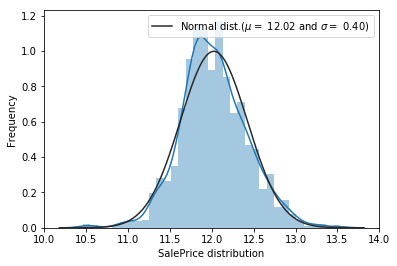

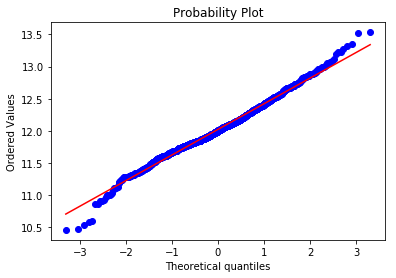

In [56]:
#numpyのlog1 functionを利用する
df_train['SalePrice']=np.log1p(df_train["SalePrice"])

#新しい分布を確認
sns.distplot(df_train['SalePrice'],fit=norm)

#平均と標準偏差をもとめる
(mu,sigma)=norm.fit(df_train['SalePrice'])
print('\n mu={:.2f} and sigma ={:.2f}\n'.format(mu,sigma))

#新しい分布をプロット
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
#　ラベル
plt.ylabel('Frequency')
plt.xlabel('SalePrice distribution')

#QQプロット
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()


# 特徴量エンジニアリング

In [57]:
ntrain=df_train.shape[0]
ntest=df_test.shape[0]
y_train=df_train.SalePrice.values
all_data=pd.concat((df_train,df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is :{}".format(all_data.shape))



all_data size is :(2917, 79)


C:\Users\10696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


## 欠損対応

In [58]:
#欠損値の確認
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)









,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

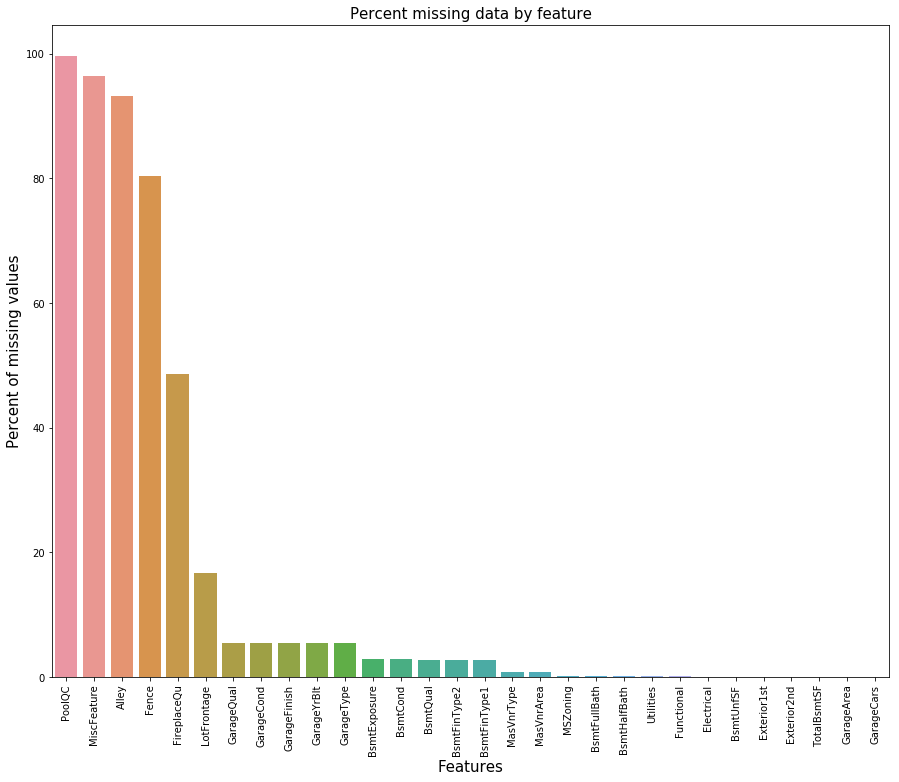

In [59]:
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature',fontsize=15)

In [60]:
#欠損対応 (データ項目説明参照)

#None置換
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["Fence"]=all_data["Fence"].fillna("None")
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("None")

for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col]=all_data[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#0置換
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col]=all_data[col].fillna(0)
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#median置換 Neighthood(近所)でグループバイしてやれば、エリア毎のmedianを求めることができる
all_data['LotFrontage']=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#特定の値に置換
all_data["Functional"]=all_data["Functional"].fillna("Typ")

#列の削除
all_data=all_data.drop(['Utilities'],axis=1)

#欠損値のあるデータ項目がないか確認する
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio


## 量的変数から質的変数へ変換

In [61]:
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)
all_data['OverallCond']=all_data['OverallCond'].astype(str)

all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)


## label encoding

In [62]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
# LabelEncoder:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


## 特徴量作成
地下から2階までの面積を総計して、新しい特徴量を作成する

In [63]:
all_data['TotalSF']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

## 尖度チェック

In [64]:
#量的変数の抜き出し
numeric_feats=all_data.dtypes[all_data.dtypes !="object"].index

#尖度一覧
skewed_feats=all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features:\n")

skewness=pd.DataFrame({'Skew':skewed_feats})
skewness.head(10)


Skew in numerical features:



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


## BoxCox変換

In [65]:
#正規分布の形にしてくれるみたいだが、なぜそうなるのか理解できていない
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


## ダミー化

In [66]:
all_data=pd.get_dummies(all_data)
print(all_data.shape)

all_data.head(20)

(2917, 220)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.000000,0.730463,1.540963,1.820334,1.540963,11.170327,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.000000,0.730463,1.540963,1.820334,0.730463,12.062832,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.000000,0.730463,1.540963,1.820334,1.194318,10.200343,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.000000,0.730463,1.540963,0.730463,1.540963,8.274266,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.000000,0.730463,1.820334,1.820334,0.000000,10.971129,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
5,11.493820,10.589574,9.178051,0.730463,0.730463,1.820334,1.540963,11.267217,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
6,13.670207,0.000000,0.000000,0.730463,1.540963,1.820334,0.000000,13.031093,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
7,12.413831,12.077149,0.000000,0.730463,1.540963,1.820334,1.194318,11.702249,4.597157,0.000000,...,0,0,0,0,0,0,0,0,0,1
8,12.186751,11.339779,0.000000,0.730463,1.194318,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,0,0,1
9,12.335431,0.000000,0.000000,0.730463,1.194318,1.820334,1.540963,11.676516,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1


## テストデータと学習データの用意

In [67]:
train=all_data[:ntrain]
test=all_data[ntrain:]

# モデル

## 交差検証

In [68]:
n_folds=5

def rmsle_cv(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,train.values,y_train,scoring="neg_mean_squared_error",cv=kf))
    return(rmse)


## モデル実装

### LASSO
外れ値に弱いモデルなので、RobustScalerで対応する

In [69]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))


### elastic net regression
外れ値対応

In [70]:
Enet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=0.9,random_state=3))

### Kernel ridge regression

In [71]:
KRR=KernelRidge(alpha=0.6,kernel='polynomial',degree=2,coef0=2.5)

### Gradient Bossting regression

In [72]:
GBoost=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,max_features='sqrt',min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=5)

### XGBoost

In [73]:
# model_xgb=xgb.XGBRegressor(colsample_bytree=0.463,gamma=0.0468,learning_rate=0.05,max_depth=3,min_child_weight=1.7817,n_estimators=2200,reg_alpha=0.4640,reg_lambda=0.8571,subsample=0.5123,silent=1,random_state=7,nthread=-1)

### LightGBM

In [74]:
model_lgb=lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05,n_estimators=720,max_bin=55,bagging_fraction=0.8,bagging_freq=5,feature_fraction=0.2319,feature_fraction_seed=9,bagging_seed=9,min_data_in_leaf=6,min_sum_hessian_in_leaf=11)

## モデルのスコア

### lassoスコア

In [75]:
score=rmsle_cv(lasso)
print("\nLasso score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Lasso score:0.1115 (0.0074)



### Elastic Netスコア

In [76]:
score=rmsle_cv(Enet)
print("\nEnet score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Enet score:0.1116 (0.0074)



### Kernel Ridgeスコア

In [77]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



### 勾配Boostingスコア

In [78]:
score=rmsle_cv(GBoost)
print("\nGBoost score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


GBoost score:0.1177 (0.0080)



### LGMBスコア

In [79]:
score=rmsle_cv(model_lgb)
print("\nLGBM score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


LGBM score:0.1162 (0.0075)



## スタッキングモデル

In [80]:
#複数モデルをスタックするクラス

class AveragingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models=models
        
    def fit(self,x,y):
        self.models_=[clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(x,y)
        
        return self

    def predict(self,X):
        predictions=np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis=1)
    

In [81]:
#シンプルなスタッキング：4つのモデルを平均化
averaged_models=AveragingModels(models=(Enet,GBoost,KRR,lasso))

score=rmsle_cv(averaged_models)
print("Average base models score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))

Average base models score:0.1091 (0.0075)



In [82]:
#複雑なスタッキング
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
        

In [83]:
#Stacking Averaged models score

stacked_averaged_models=StackingAveragedModels(base_models=(Enet,GBoost,KRR),meta_model=lasso)
score=rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0074)


## アンサンブリング

In [84]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



### StackedRegressor

In [85]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07803882799654893


LightGBM

In [86]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07279273314127263


In [87]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.5+lgb_train_pred*0.5 ))

RMSLE score on train data:
0.07334211451095056
